In [2]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
raw_data = pd.read_csv('epi_r.csv')

In [4]:
list(raw_data.columns)
raw_data.shape

(20052, 680)

In [5]:
raw_data.rating.describe()

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

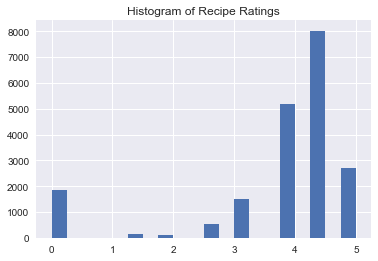

In [6]:
raw_data.rating.hist(bins=20)
plt.title('Histogram of Recipe Ratings')
plt.show()

In [7]:
# Count nulls 
null_count = raw_data.isnull().sum()
null_count[null_count>0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

In [8]:
from sklearn.svm import SVR
svr = SVR()
# X = raw_data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1)
# Y = raw_data.rating
# svr.fit(X,Y)

In [9]:
# plt.scatter(Y, svr.predict(X))

In [10]:
# svr.score(X, Y)

In [11]:
from sklearn.model_selection import cross_val_score
# cross_val_score(svr, X, Y, cv=5)

__Challenge.__

Transform this regression problem into a binary classifier and clean up the feature set. You can choose whether or not to include nutritional information, but try to cut your feature set down to the 30 most valuable features.

Good luck!

# Notes & To Do:
1. Reduce Feature set
 - Sum all columns, transpose and then boxplot/histogram to drop top and bottom 25% (?)
 - Use ttests to get the best features from that set
     - For loop testing each column of the df against the the Y
 - Count how many features are left and plan accordingly
2. Turn SVR to SVC

In [12]:
raw_data.drop_duplicates(keep='first',inplace=True)

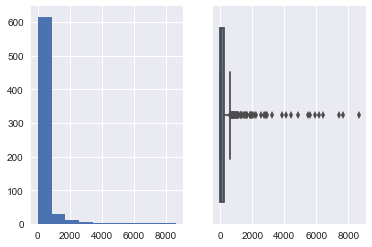

count     674.000000
mean      333.497033
std       891.161223
min         1.000000
25%         9.000000
50%        65.000000
75%       253.000000
max      8654.000000
dtype: float64

In [13]:
# Look at the tags

df_tags = raw_data.ix[:,6:]
totals = df_tags.sum()

plt.subplot(1,2,1)
plt.hist(totals)
plt.subplot(1,2,2)
sns.boxplot(totals)
plt.show()
totals.describe()

In [14]:
# Make the tags into proportions and look at the distribution

num_rows = raw_data.shape[0]
tag_proportion = totals/num_rows
tag_proportion.describe()

count    674.000000
mean       0.018273
std        0.048828
min        0.000055
25%        0.000493
50%        0.003561
75%        0.013862
max        0.474166
dtype: float64

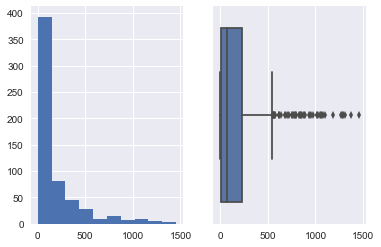

count     595.000000
mean      179.315966
std       264.886522
min         2.000000
25%        12.000000
50%        68.000000
75%       227.000000
max      1454.000000
dtype: float64

In [15]:
# Try cleaning up by proportion. Leave in the higher values. Example: Bottom 5% and top 95%

q1  = totals.quantile(.05)
q3  = totals.quantile(.95)
totals_cleaned = totals.loc[(totals > q1) & 
                            (totals < q3)]

plt.subplot(1,2,1)
plt.hist(totals_cleaned)
plt.subplot(1,2,2)
sns.boxplot(totals_cleaned)
plt.show()
totals_cleaned.describe()

In [16]:
df = raw_data[list(totals_cleaned.index) + ['rating']]

In [17]:
X = df.drop(['rating'], 1)
Y = df.rating
# svr.fit(X,Y)

In [18]:
# svr.score(X, Y)

In [19]:
# cross_val_score(svr, X, Y, cv=5)

In [20]:
from scipy import stats

t_list = []
p_list = []
for col in raw_data.columns[raw_data.columns.isin(df_tags.columns)]:
    value = stats.f_oneway(*[value for name, value in raw_data.groupby('rating')[col]])
    t_list.append(value[0])
    p_list.append(value[1])

In [21]:
df_setup = {'feature':raw_data.columns[raw_data.columns.isin(df_tags.columns)],
            't_value':t_list,
            'p_value':p_list, 
            'proportion':tag_proportion}
df_statistics = pd.DataFrame(df_setup)
df_statistics.reset_index(inplace=True,drop=True)
df_statistics.sort_values('t_value',ascending=False,inplace=True)
df_statistics

,feature,p_value,proportion,t_value
186,drink,0.000000e+00,0.058298,308.837991
8,alcoholic,0.000000e+00,0.045093,265.192820
277,house & garden,1.978288e-266,0.024382,185.328420
235,gin,2.890704e-220,0.012273,152.849985
133,cocktail,9.122826e-156,0.020382,108.046947
580,spirit,4.395336e-130,0.011835,90.380346
134,cocktail party,6.951335e-122,0.060216,84.759372
50,bitters,5.000148e-111,0.006849,77.329406
57,bon appétit,2.851787e-72,0.474166,50.908072
262,harpercollins,4.598124e-67,0.006630,47.366386


In [22]:
feature_set = df_statistics[df_statistics['p_value'] < .05]['feature']

X = raw_data[feature_set]
Y = raw_data['rating']

In [23]:
# cross_val_score(svr, X, Y, cv=5)

# I made a terrible model less terrible

Now to convert to a classifier

In [30]:
# Make rating binary

raw_data['rating_high'] = np.where(raw_data['rating'] > 4, 1, 0)

In [31]:
from sklearn.svm import SVC
svc = SVC()

In [32]:
X = raw_data[feature_set]
y = raw_data['rating_high']

scre = cross_val_score(svc, X, y)
print (scre)
print (scre.mean())

[ 0.58307313  0.59115568  0.59542989]
0.589886232327
